In [210]:
#Importing libraries and packages
import pandas as pd
import numpy as np
import math
import datetime as dt
import tensorflow as tf
import plotly.graph_objects as go
import plotly.express as px
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, GRU
from itertools import cycle
from plotly.subplots import make_subplots

In [211]:
#Loading dataset
df = pd.read_csv('MGAWY.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,3/2/2020,14.20,14.210,13.29,14.21,14.019337,13900.0
1,3/3/2020,14.21,14.210,14.21,14.21,14.019337,0.0
2,3/4/2020,14.21,14.210,13.29,13.29,13.111681,4200.0
3,3/5/2020,13.08,14.170,13.08,13.51,13.328730,8000.0
4,3/6/2020,12.80,13.365,12.75,12.75,12.578926,7000.0


In [212]:
#Renaming columns
df.rename(columns={"Date":"date","Open":"open","High":"high","Low":"low","Close":"close"}, inplace= True)
df.head()

,date,open,high,low,close,Adj Close,Volume
0,3/2/2020,14.20,14.210,13.29,14.21,14.019337,13900.0
1,3/3/2020,14.21,14.210,14.21,14.21,14.019337,0.0
2,3/4/2020,14.21,14.210,13.29,13.29,13.111681,4200.0
3,3/5/2020,13.08,14.170,13.08,13.51,13.328730,8000.0
4,3/6/2020,12.80,13.365,12.75,12.75,12.578926,7000.0


In [213]:
#Checking for null value
df.isnull().sum()

date         13
open         13
high         13
low          13
close        13
Adj Close    13
Volume       13
dtype: int64

In [214]:
#Checking NA value
df.isna().any()

date         True
open         True
high         True
low          True
close        True
Adj Close    True
Volume       True
dtype: bool

In [215]:
df.dropna(inplace=True)
df.isna().any()

date         False
open         False
high         False
low          False
close        False
Adj Close    False
Volume       False
dtype: bool

In [216]:
#Checking the type of data for each column
print("Date column data type: ", type(df['date'][0]))
print("Open column data type: ", type(df['open'][0]))
print("Close column data type: ", type(df['close'][0]))
print("High column data type: ", type(df['high'][0]))
print("Low column data type: ", type(df['low'][0]))

Date column data type:  <class 'str'>
Open column data type:  <class 'numpy.float64'>
Close column data type:  <class 'numpy.float64'>
High column data type:  <class 'numpy.float64'>
Low column data type:  <class 'numpy.float64'>


In [217]:
#Converting date field from string to date from at and make it index
df['date'] = pd.to_datetime(df.date)
df.head()

,date,open,high,low,close,Adj Close,Volume
0,2020-03-02,14.20,14.210,13.29,14.21,14.019337,13900.0
1,2020-03-03,14.21,14.210,14.21,14.21,14.019337,0.0
2,2020-03-04,14.21,14.210,13.29,13.29,13.111681,4200.0
3,2020-03-05,13.08,14.170,13.08,13.51,13.328730,8000.0
4,2020-03-06,12.80,13.365,12.75,12.75,12.578926,7000.0


In [218]:
#Sorting dataset by date format
df.sort_values(by='date', inplace=True)
df.head()

,date,open,high,low,close,Adj Close,Volume
0,2020-03-02,14.20,14.210,13.29,14.21,14.019337,13900.0
1,2020-03-03,14.21,14.210,14.21,14.21,14.019337,0.0
2,2020-03-04,14.21,14.210,13.29,13.29,13.111681,4200.0
3,2020-03-05,13.08,14.170,13.08,13.51,13.328730,8000.0
4,2020-03-06,12.80,13.365,12.75,12.75,12.578926,7000.0


In [219]:
df.shape

(657, 7)

In [220]:
#Monthwise comparison between stock actual, open and close price
monthvise= df.groupby(df['date'].dt.strftime('%B'))[['open','close']].mean().sort_values(by='close')
monthvise.head()

,open,close
date,,
September,10.455619,10.448238
August,10.604152,10.634318
May,10.749295,10.773852
July,10.878048,10.871333
October,11.566723,11.639213


In [221]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Stock actual, open and close price')
fig.show()

In [222]:
#Monthwise high and low stock price
df.groupby(df['date'].dt.strftime('%B'))['low'].min()

date
April         8.840
August        7.710
December     11.540
February     11.910
January      11.771
July          7.560
June          7.890
March         7.301
May           9.000
November     11.800
October       6.680
September     6.740
Name: low, dtype: float64

In [223]:
monthvise_high= df.groupby(df['date'].dt.strftime('%B'))['high'].max()
monthvise_low= df.groupby(df['date'].dt.strftime('%B'))['low'].min()

In [224]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low stock price')
fig.show()

In [225]:
#Trend comparision between stock price, open price, close price, high price, low price
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(df, x=df.date, y=[df['open'], df['close'], 
                                          df['high'], df['low']],
             labels={'date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [226]:
#Close price prediction preparation and preprocessing
closedf = df[['date','close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (657, 2)


In [227]:
#Plotting stock close price chart
fig = px.line(closedf, x=closedf.date, y=closedf.close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.6)
fig.update_layout(title_text='Stock close price chart', plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [228]:
#Normalizing / scaling close value between 0 to 1
close_stock = closedf.copy()
del closedf['date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(657, 1)


In [229]:
#Splitting of dataset for training and testing
training_size=int(len(closedf)*0.65)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (427, 1)
test_data:  (230, 1)


In [230]:
#Creating new dataset according to requirement of time-series prediction
#Converting array of values into a matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [231]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (411, 15)
y_train:  (411,)
X_test:  (214, 15)
y_test (214,)


In [232]:
#GRU Algorithm
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (411, 15, 1)
X_test:  (214, 15, 1)


In [233]:
#Algorithm Model Structure
tf.keras.backend.clear_session()
model=Sequential()
model.add(GRU(32,return_sequences=True,input_shape=(time_step,1)))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32,return_sequences=True))
model.add(GRU(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [234]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 15, 32)            3360      
                                                                 
 gru_1 (GRU)                 (None, 15, 32)            6336      
                                                                 
 gru_2 (GRU)                 (None, 15, 32)            6336      
                                                                 
 gru_3 (GRU)                 (None, 32)                6336      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 22,401
Trainable params: 22,401
Non-trainable params: 0
_________________________________________________________________


In [235]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=5,verbose=1)

Epoch 1/200
83/83 [==============================] - 11s 49ms/step - loss: 0.0223 - val_loss: 0.0027
Epoch 2/200
83/83 [==============================] - 3s 31ms/step - loss: 0.0058 - val_loss: 0.0034
Epoch 3/200
83/83 [==============================] - 3s 31ms/step - loss: 0.0049 - val_loss: 0.0017
Epoch 4/200
83/83 [==============================] - 3s 31ms/step - loss: 0.0044 - val_loss: 0.0018
Epoch 5/200
83/83 [==============================] - 3s 31ms/step - loss: 0.0044 - val_loss: 0.0037
Epoch 6/200
83/83 [==============================] - 3s 31ms/step - loss: 0.0051 - val_loss: 0.0014
Epoch 7/200
83/83 [==============================] - 3s 30ms/step - loss: 0.0039 - val_loss: 0.0013
Epoch 8/200
83/83 [==============================] - 3s 31ms/step - loss: 0.0042 - val_loss: 0.0014
Epoch 9/200
83/83 [==============================] - 3s 30ms/step - loss: 0.0042 - val_loss: 0.0021
Epoch 10/200
83/83 [==============================] - 3s 30ms/step - loss: 0.0037 - val_loss: 0.001

In [236]:
#Doing the prediction and checking performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

((411, 1), (214, 1))

In [237]:
#Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

In [238]:
#Evaluation metrices RMSE, MSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  0.505927120845961
Train data MSE:  0.25596225160748365
Test data MAE:  0.3845357239385081
-------------------------------------------------------------------------------------
Test data RMSE:  0.5592936771389935
Test data MSE:  0.3128094172876567
Test data MAE:  0.43033435153069893


In [239]:
#Explained variance regression score
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9518536680160978
Test data explained variance regression score: 0.9386554073850204


In [240]:
#R2 score for regression
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9457059855622901
Test data R2 score: 0.9126778415852936


In [241]:
#Regression Loss Mean Gamma deviance regression loss (MGD) and Mean Poisson deviance regression loss (MPD)
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Train data MGD:  0.0015914174801649067
Test data MGD:  0.003181894150073448
----------------------------------------------------------------------
Train data MPD:  0.020009126362139106
Test data MPD:  0.03106904366684154


In [242]:
#Comparision between original stock close price vs predicted close price
#Shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

#Shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)


names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

plotdf = pd.DataFrame({'date': close_stock['date'],
                       'original_close': close_stock['close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (657, 1)
Test predicted data:  (657, 1)


In [243]:
#Predicting the next 10 days
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 15
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  15


In [244]:
#Plotting last 15 days and next predicted 10 days
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30]


In [245]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})
names = cycle(['Last 15 days close price','Predicted next 10 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 10 days',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [246]:
#Plotting whole closing stock price with prediction
grudf=closedf.tolist()
grudf.extend((np.array(lst_output).reshape(-1,1)).tolist())
grudf=scaler.inverse_transform(grudf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])
fig = px.line(grudf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

#Stock Price Prediction 
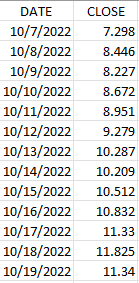